# Perceptron - NeuralNetwork

In [84]:
#from src.perceptron import perceptron
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
from src.utils import *
sns.set()
plt.rcParams["figure.figsize"] = (4,2.5)

# Creditcard Dataset

In [85]:
data_set_name = "creditcard"
#df, fd, fdi = perceptron("creditcard", 
#                         number_of_epoch=300, 
#                         hidden_neurons=((), (15,), (10,), (5,), (10,5), (15,5)),
#                         use_batch_norm_values=(True,),
#                         optimizer_values=('rmsprop', ),
#                         activation_values=('sigmoid', 'relu', 'linear', 'selu'),
#                         training_sizes=(-1,)
#                         )
with open("stats/per_" + data_set_name + "_dict.pikle", 'rb') as handle:
    dd = pickle.load(handle)
with open("stats/per_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
    ddi = pickle.load(handle)

In [86]:
print(ddi)

{'optimizer': 0, 'activation': 1, 'use_batch_norm': 2, 'layers': 3, 'train_limit': 4, 'epoch': 5, 'score_type': 6}


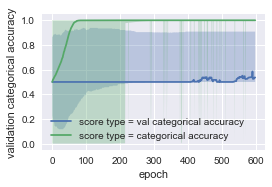

In [87]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['val_categorical_accuracy', 'categorical_accuracy'])])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+"_full.png")
plt.show()

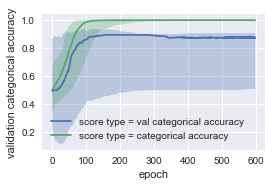

In [88]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['val_categorical_accuracy', 'categorical_accuracy']), (ddi['use_batch_norm'], True)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

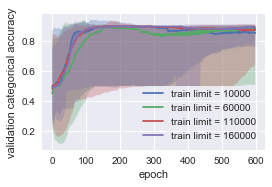

In [89]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'train_limit'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['val_categorical_accuracy']), (ddi['use_batch_norm'], True)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

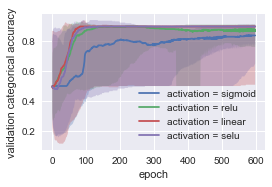

In [90]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'activation'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['val_categorical_accuracy']), (ddi['use_batch_norm'], True)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

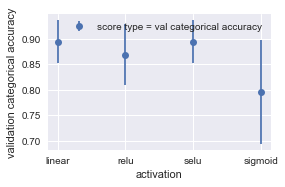

In [91]:
x_arg_name = 'activation'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['val_categorical_accuracy']), (ddi['use_batch_norm'], True)])
plt.figure()
for a, d in cd.items():
    plt.errorbar(d.get(x_arg_name),d.get('median'), 
                 yerr=d.get('max') - d.get('median'),
                 fmt='o',
                 label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    #plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

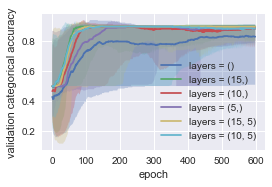

In [92]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'layers'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['val_categorical_accuracy']), (ddi['use_batch_norm'], True)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

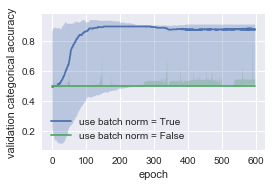

In [93]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'use_batch_norm'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['val_categorical_accuracy'])])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

# Starcraft Dataset

In [94]:
data_set_name = "starcraft"
#df, fd, fdi = perceptron("creditcard", 
#                         number_of_epoch=300, 
#                         hidden_neurons=((), (15,), (10,), (5,), (10,5), (15,5)),
#                         use_batch_norm_values=(True,),
#                         optimizer_values=('rmsprop', ),
#                         activation_values=('sigmoid', 'relu', 'linear', 'selu'),
#                         training_sizes=(-1,)
#                         )
with open("stats/per_" + data_set_name + "_dict.pikle", 'rb') as handle:
    dd = pickle.load(handle)
with open("stats/per_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
    ddi = pickle.load(handle)

In [95]:
print(ddi)

{'optimizer': 0, 'activation': 1, 'use_batch_norm': 2, 'layers': 3, 'train_limit': 4, 'epoch': 5, 'score_type': 6}


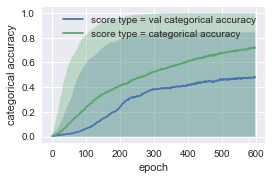

In [96]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['val_categorical_accuracy', 'categorical_accuracy'])])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+"_full.png")
plt.show()

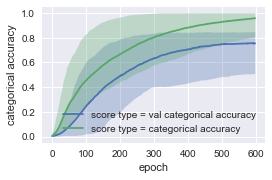

In [97]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['val_categorical_accuracy', 'categorical_accuracy']), (ddi['use_batch_norm'], True)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

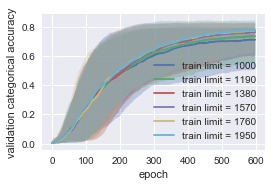

In [98]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'train_limit'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['val_categorical_accuracy']), (ddi['use_batch_norm'], True)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

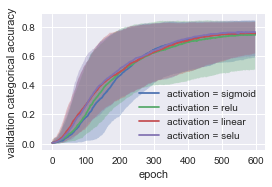

In [99]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'activation'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['val_categorical_accuracy']), (ddi['use_batch_norm'], True)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

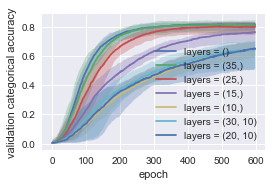

In [100]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'layers'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['val_categorical_accuracy']), (ddi['use_batch_norm'], True)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

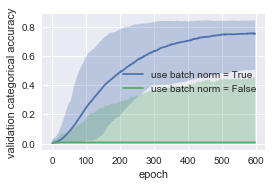

In [101]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'use_batch_norm'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['val_categorical_accuracy'])])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

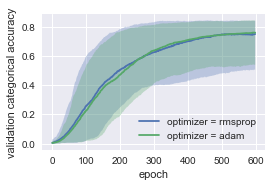

In [102]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'optimizer'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
                           consolidate_argy=y_arg_id, argy_name=y_arg_name,
                           consolidate_argz=z_arg_id,
                           filters=[(ddi['score_type'], ['val_categorical_accuracy']), (ddi['use_batch_norm'], True)])
plt.figure()
for a, d in cd.items():
    plt.plot(d.get(x_arg_name),d.get('median'), 
             label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
    #plt.fill_between(d.get(x_arg_name), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
    plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
#plt.title("Evolution of acuracy acording to the number of training examples")
plt.savefig("graphs/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

In [82]:
np.random.seed(6)
xt, yt, xs, ys = get_data("starcraft", "keras")


Selected data set is starcraft with 2834 data (train: 1950 , test: 884 )


In [43]:
for tl in range(1000, 2000, 190):
    s = np.sum(yt[:tl], axis=0)
    print(tl, "min", np.min(s), "median", np.median(s), "max", np.max(s), "zero count", np.sum(s == 0))

1000 min 0 median 4.0 max 19 zero count 16
1190 min 0 median 5.0 max 25 zero count 13
1380 min 0 median 6.0 max 28 zero count 4
1570 min 0 median 7.0 max 33 zero count 1
1760 min 0 median 7.0 max 40 zero count 1
1950 min 1 median 7.0 max 42 zero count 0
